

# Project: Investigate a Dataset of (Medical Appointment No Shows!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Project Overview**: This project works on dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
>● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>
>● ‘Neighborhood’ indicates the location of the hospital.
>
>● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we prepare dataset for analysis

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning (1- Check data reliability!)

In [3]:
# Showing raw shape of dataset
df.shape

(110527, 14)

In [4]:
# Showing duplication in raws if any.
df.duplicated().sum()

0

In [5]:
# Showing unique for PatientID to discover reptitive appointment for same patient
df['PatientId'].nunique()

62299

In [6]:
# Showing total number of PatientId with reptitive appointment
df['PatientId'].duplicated().sum()

48228

In [7]:
# Showing status of No_show columon for reptitve PatientId
df.duplicated(['PatientId','No-show']).sum()

38710

In [8]:
# Showing if there are any missing or rubbish data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Getting general look for data statistics to show quality level for dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [68]:
# Identify wrong interance for age "-1" location to be used in cleaning section
wrong_entrance = df.query('Age == "-1"')
wrong_entrance

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


### Data Cleaning (2- Finilize data preparation for analysis!)

In [11]:
# Remove wrong entrance "Age = -1"
df.drop(index=99832, inplace=True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# Column names spelling correction
df.rename(columns={'No-show':'No_show'}, inplace= True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# removing duplicated IDs with No-show status as it will not add value for analysis
df.drop_duplicates(['PatientId','No_show'], inplace=True)
# showing dataset new structure
df.shape

(71816, 14)

In [15]:
# Removing no need columns 
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay'], axis=1, inplace=True)
# showing dataset 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

>  Now datast is ready for us to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.



### Overview of Dataset

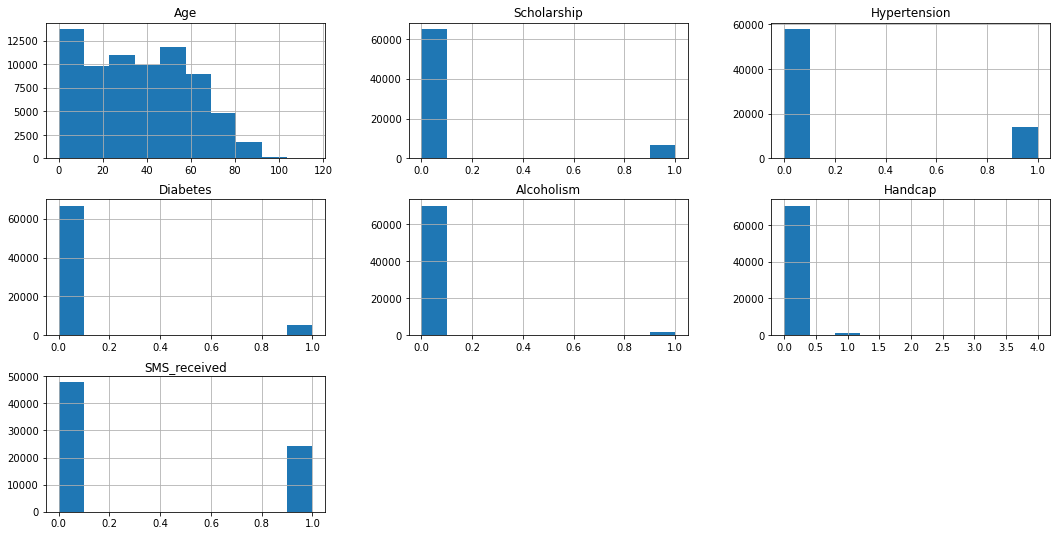

In [16]:
# Showing general distribuation for each column againt patient numbers
df.hist(figsize = (18,9));

Notice that much patients did not received SMS, aslo much of them is not under Scholarship ambrila.

In [17]:
# Count show versues no show to start propar analysis
No_show_count = df.No_show =='Yes'
show_count = df.No_show =='No'

df[show_count].count(),df[No_show_count].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [18]:
# Mean for show and no show counts
df[show_count].mean(), df[No_show_count].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Notice that main difference here is SMS_received parameter.

### Relations between each column and its effect regarding Patient attendance

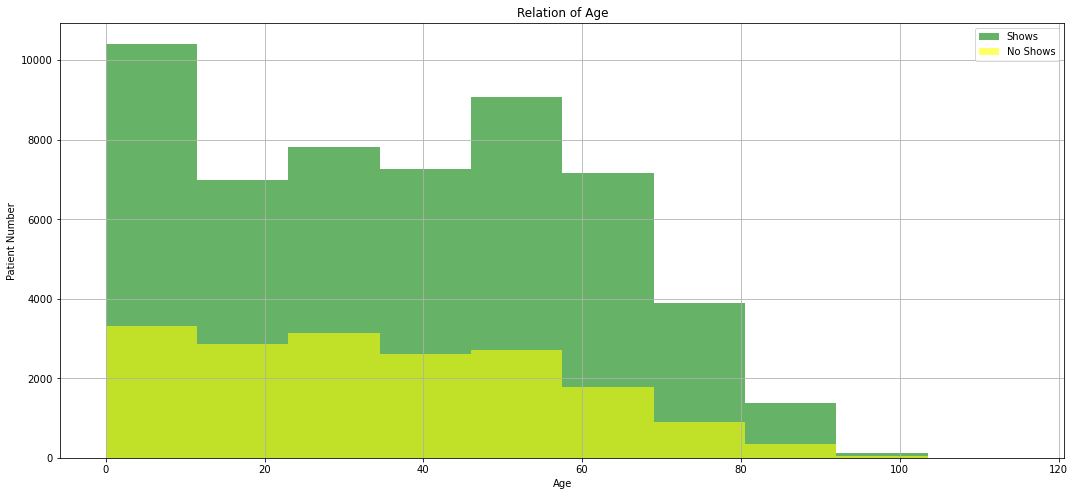

In [19]:
# 1- Age against attendance
def attendance(df,col_name,attended,absent):
    plt.figure(figsize = [18,8])
    df[col_name][show_count].hist(alpha=.6,bins=10,color='green',label='Shows')
    df[col_name][No_show_count].hist(alpha=.6,bins=10,color='yellow',label='No Shows')
    plt.legend();
    plt.title('Relation of Age and attendance')
    plt.xlabel('Age')
    plt.ylabel('Patient Number');
attendance(df,'Age',show_count,No_show_count)

No major notice. however, there are two bands of age showed slight high shows (0 ==> 8) and (48 ==> 58) years

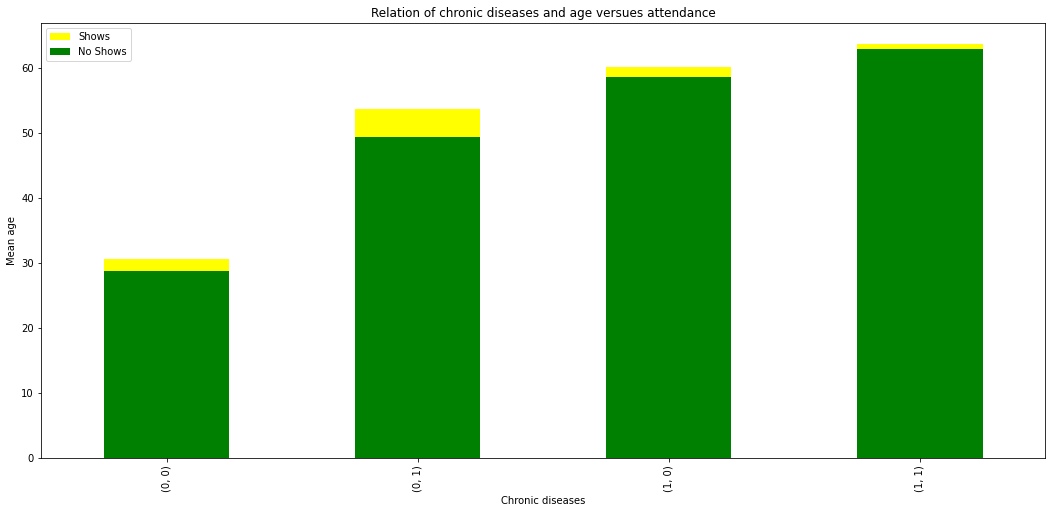

In [28]:
# 2- chronic diseases effect
plt.figure(figsize=[18,8])
df[show_count].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='yellow',label='Shows')
df[No_show_count].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='green',label='No Shows')
plt.legend();
plt.title('Relation of chronic diseases and age versues attendance')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean age');

No major relation can be defined for chronic diseases and patient attendance

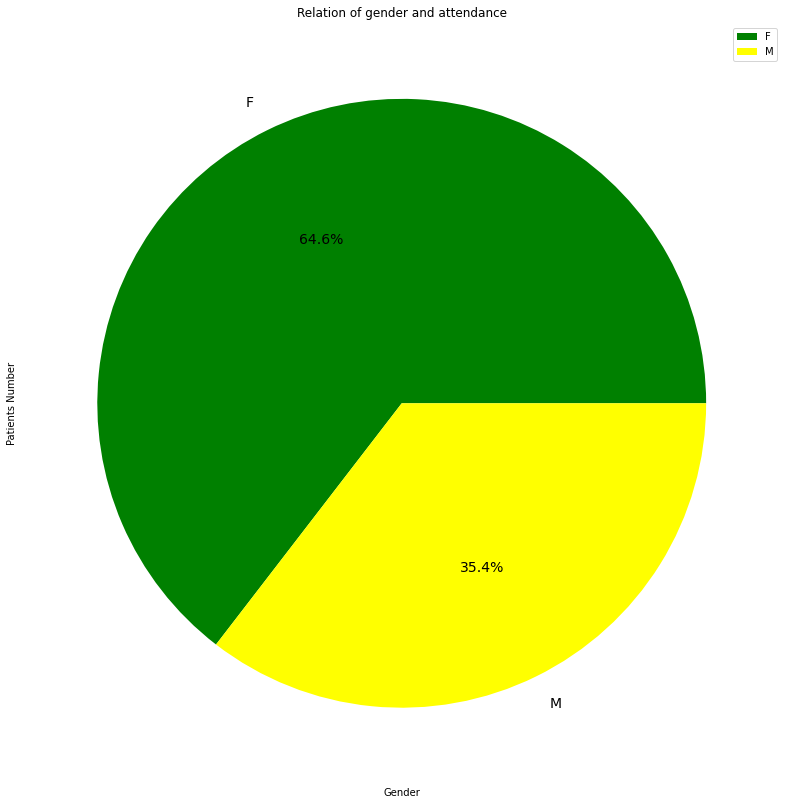

In [44]:
# 3- Gender effect
#   a- for show only
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,14])
    df[col_name][show_count].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=14,colors=['green', 'yellow'],label='Show')
    plt.legend();
    plt.title('Relation of gender and attendance')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
attendance(df,'Gender',show_count,No_show_count)

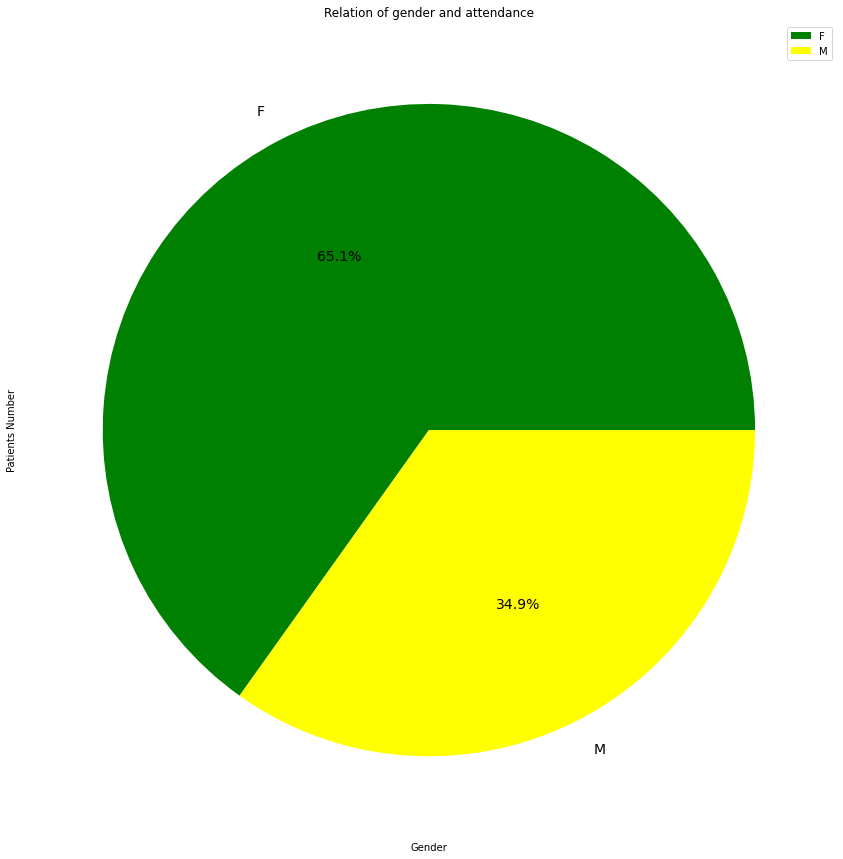

In [42]:
#   b- for No show only
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,15])
    df[col_name][No_show_count].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=14,colors=['green', 'yellow'],label='Show')
    plt.legend();
    plt.title('Relation of gender and attendance')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
attendance(df,'Gender',show_count,No_show_count)

As showing above, no significant change was found so gender has no major effect on attendance

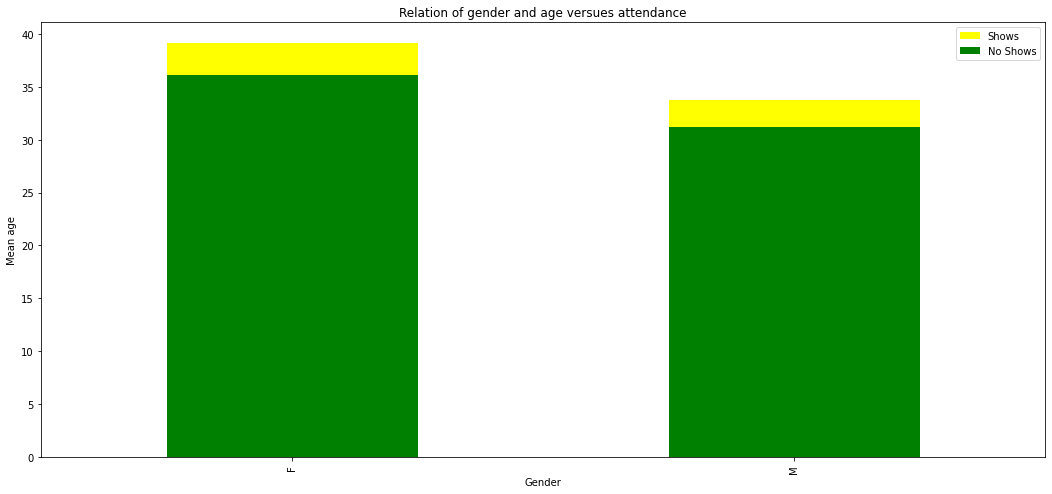

In [25]:
# 4- Check if there are any relation between age and gender
plt.figure(figsize=[18,8])
df[show_count].groupby('Gender').mean()['Age'].plot(kind='bar',color='yellow',label='Shows')
df[No_show_count].groupby('Gender').mean()['Age'].plot(kind='bar',color='green',label='No Shows')
plt.legend();
plt.title('Relation of gender and age versues attendance')
plt.xlabel('Gender')
plt.ylabel('Mean age');

Also, here no significant relation was found

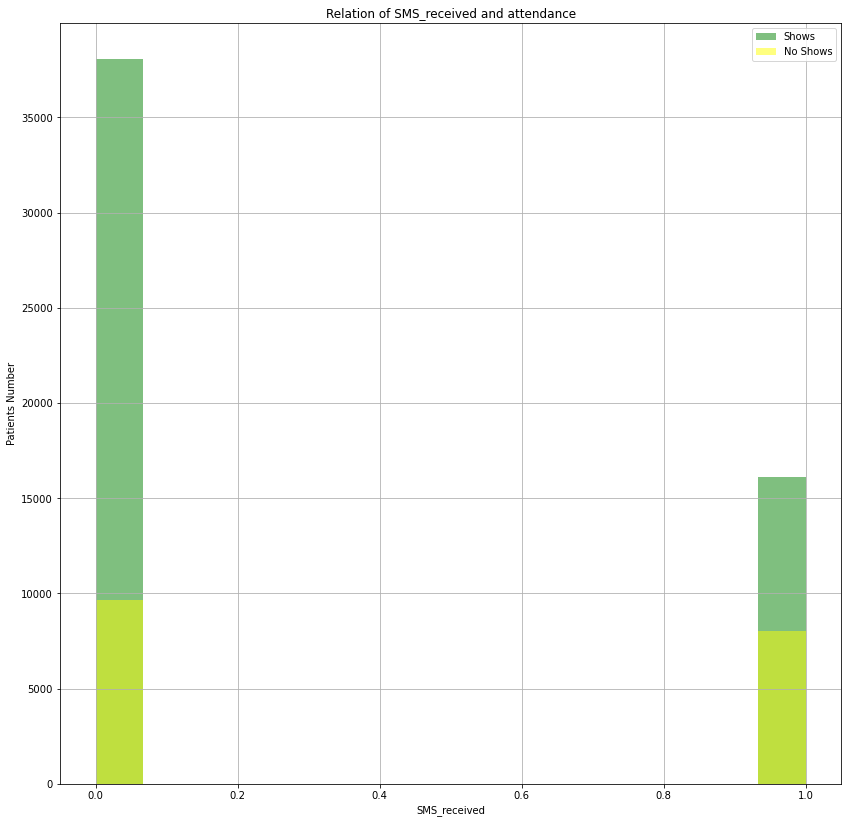

In [45]:
# 5- Check SMS_received effect 
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,14])
    df[col_name][show_count].hist(alpha=.5,bins=15,color='green',label='Shows');
    df[col_name][No_show_count].hist(alpha=.5,bins=15,color='yellow',label='No Shows');    
    plt.legend();
    plt.title('Relation of SMS_received and attendance')
    plt.xlabel('SMS_received')
    plt.ylabel('Patients Number')
attendance(df,'SMS_received',show_count,No_show_count)

Here, something warried. Attendance percentage% showed same value which lead us to revisit SMS content. Also, we should increase SMS number.

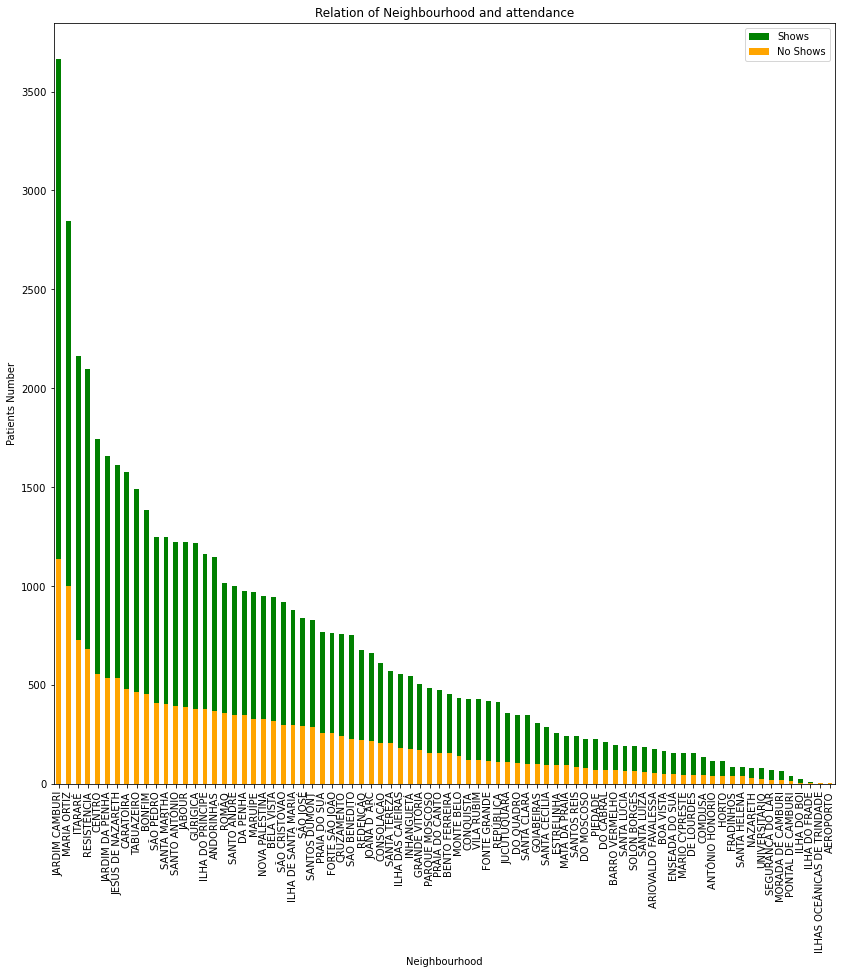

In [48]:
# 6- check neighbourhood effect
plt.figure(figsize=[14,14])
df.Neighbourhood[show_count].value_counts().plot(kind='bar',color='green',label='Shows')
df.Neighbourhood[No_show_count].value_counts().plot(kind='bar',color='orange',label='No Shows')
plt.legend()
plt.title('Relation of Neighbourhood and attendance')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

Very important effect attandance showed above, neighborhood significally affected attendance.

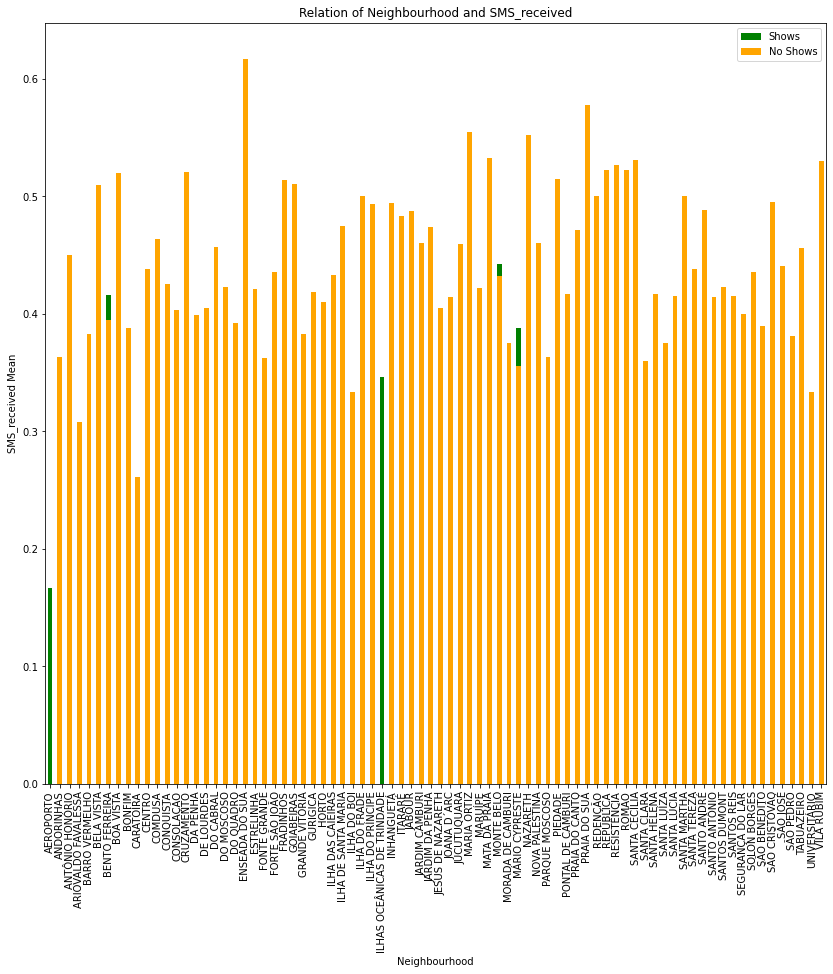

In [50]:
# 7- Now it is the time to check effect of 
#   receiving sms on neighbourhood
plt.figure(figsize=[14,14])
df[show_count].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='green',label='Shows')
df[No_show_count].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='orange',label='No Shows')
plt.legend()
plt.title('Relation of Neighbourhood and SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('SMS_received Mean');

Above graph, confirm that SMS content should be revisted.

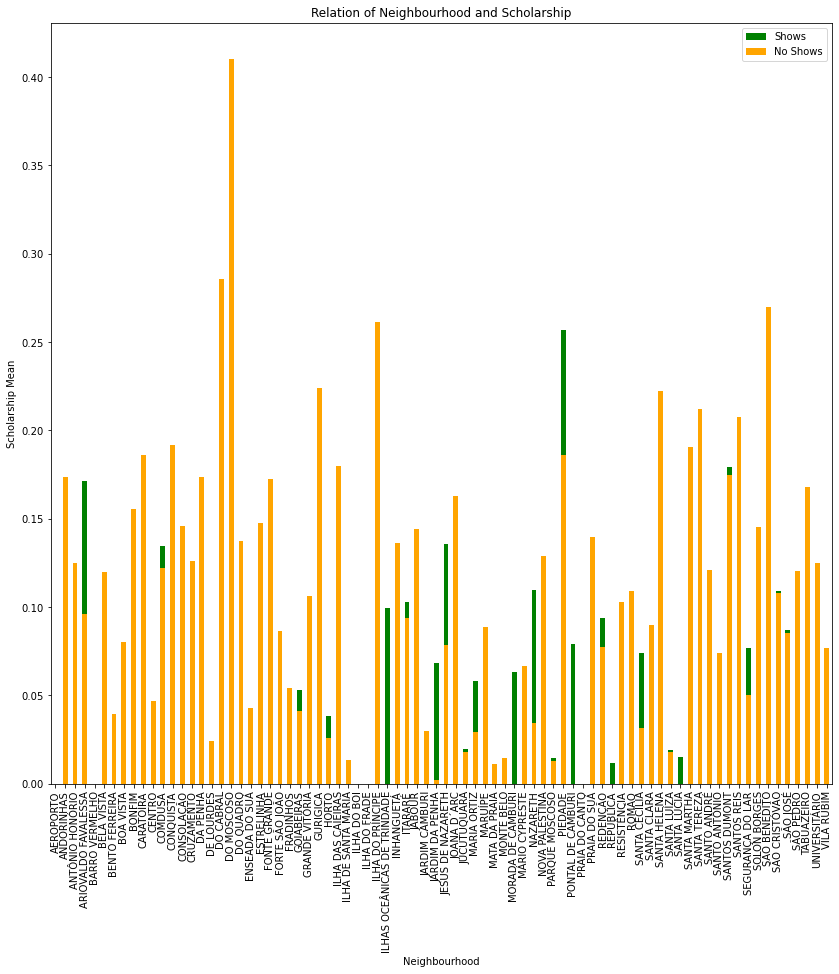

In [51]:
# 8- Now it is the time to check effect of 
#   scholarship on neighbourhood
plt.figure(figsize=[14,14])
df[show_count].groupby('Neighbourhood').Scholarship.mean().plot(kind='bar',color='green',label='Shows')
df[No_show_count].groupby('Neighbourhood').Scholarship.mean().plot(kind='bar',color='orange',label='No Shows')
plt.legend()
plt.title('Relation of Neighbourhood and Scholarship')
plt.xlabel('Neighbourhood')
plt.ylabel('Scholarship Mean');

This graph showed low mean value for scholarship 

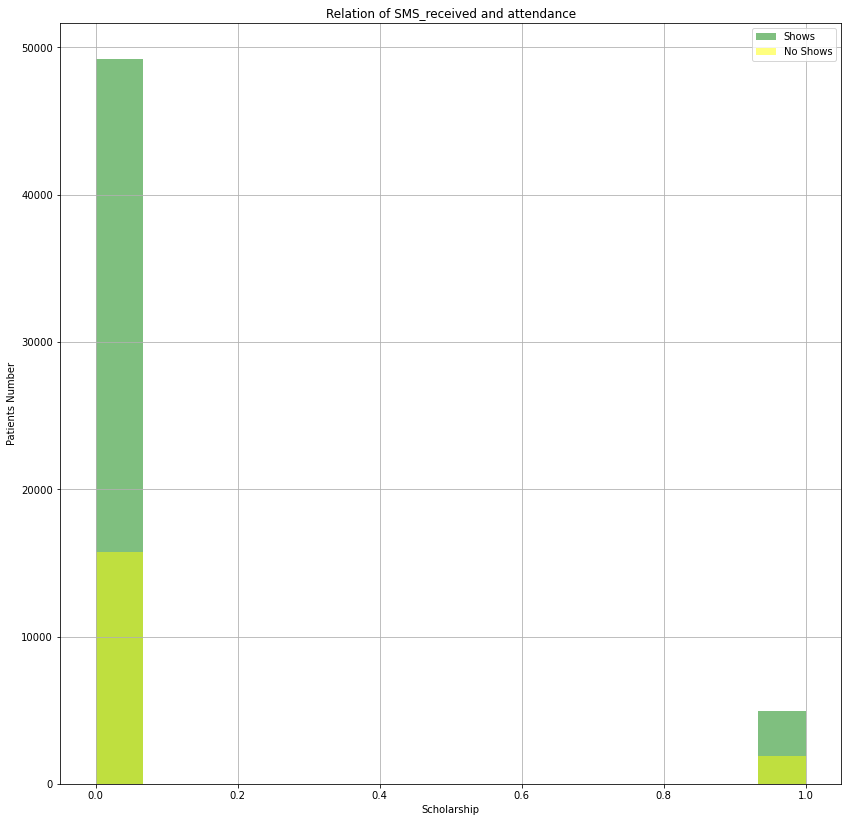

In [53]:
# 9- So check scholarship effect
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,14])
    df[col_name][show_count].hist(alpha=.5,bins=15,color='green',label='Shows');
    df[col_name][No_show_count].hist(alpha=.5,bins=15,color='yellow',label='No Shows');    
    plt.legend();
    plt.title('Relation of SMS_received and attendance')
    plt.xlabel('Scholarship')
    plt.ylabel('Patients Number')
attendance(df,'Scholarship',show_count,No_show_count)

Also, strange concept appeared as no scholarship patients have high ratio of attendance than scholarship patients

<a id='conclusions'></a>
## Conclusions

>  Finally, here below are the summary of our findings and the results that have been performed. 

> 1- Very important effect attandance showed above, neighbourhood significally affected attendance. we need deep analysis for neighbourhood to identify differances.

> 2- Attendance percentage% showed same value for receiving and no receiving sms which lead us to revisit SMS content. Also, we should increase SMS number.

> 3- Also, strange concept appeared as no scholarship patients have high ratio of attendance than scholarship patients. We should revist scholarship condition and terms.


In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate-a-Dataset-Amir-Mohamed.ipynb'])

1